In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the CSV file

At first Save country.csv in a directory and read it


In [71]:
df = pd.read_csv("country.csv")
df.head()


,Unnamed: 0,Unnamed: 0.1,DataSource,Unnamed:1,https://data.worldbank.org,Unnamed:3,Unnamed:4
0,0,0,Data,NaN,2016,NaN,NaN
1,1,1,CountryName,CountryCode,Population growth,Total population,Area (sq. km)
2,2,2,Brazil,BRA,0.817555711,207652865,8358140
3,3,3,Switzerland,CHE,1.077221168,8372098,39516
4,4,4,Germany,DEU,1.193866758,82667685,348900



Read it again this time with right header and check the 5 rows of the data frame


In [72]:
df = pd.read_csv("country.csv", skiprows = 2) #header=2
df.head()

,1,1.1,CountryName,CountryCode,Population growth,Total population,Area (sq. km)
0,2,2,Brazil,BRA,0.817556,207652865.0,8358140.0
1,3,3,Switzerland,CHE,1.077221,8372098.0,39516.0
2,4,4,Germany,DEU,1.193867,82667685.0,348900.0
3,5,5,Denmark,DNK,0.834638,NaN,42262.0
4,6,6,Spain,ESP,-0.008048,46443959.0,500210.0


In [73]:
df.tail()

,1,1.1,CountryName,CountryCode,Population growth,Total population,Area (sq. km)
12,14,14,Iran,IRN,1.148789,8.027743e+07,1628760.0
13,15,15,Qatar,QAT,3.495070,2.569804e+06,11610.0
14,16,16,Sweden,SWE,NaN,9.903122e+06,407310.0
15,17,17,India,IND,1.148215,1.324171e+09,2973190.0
16,18,18,World,WLD,1.181680,7.442136e+09,129733172.7


# Drop unwanted columns

Drop the columnws 1 and CountryCode

In [74]:
df.drop(['1','1.1', 'CountryCode'], axis=1, inplace=True)
df.head()

,CountryName,Population growth,Total population,Area (sq. km)
0,Brazil,0.817556,207652865.0,8358140.0
1,Switzerland,1.077221,8372098.0,39516.0
2,Germany,1.193867,82667685.0,348900.0
3,Denmark,0.834638,NaN,42262.0
4,Spain,-0.008048,46443959.0,500210.0


# Change the columns' labels

Change the columns' labels to Name, pop_growth, pop, Area

In [75]:
df.columns = ['Name', 'pop_growth', 'pop', 'Area']
df.columns

Index(['Name', 'pop_growth', 'pop', 'Area'], dtype='object')

In [76]:
df.head()

,Name,pop_growth,pop,Area
0,Brazil,0.817556,207652865.0,8358140.0
1,Switzerland,1.077221,8372098.0,39516.0
2,Germany,1.193867,82667685.0,348900.0
3,Denmark,0.834638,NaN,42262.0
4,Spain,-0.008048,46443959.0,500210.0


# Change the index

Change the index to the name of country

In [77]:
df.set_index('Name', inplace=True)
df.head()

,pop_growth,pop,Area
Name,,,
Brazil,0.817556,207652865.0,8358140.0
Switzerland,1.077221,8372098.0,39516.0
Germany,1.193867,82667685.0,348900.0
Denmark,0.834638,NaN,42262.0
Spain,-0.008048,46443959.0,500210.0


# Duplicates

Show the duplicated rows by using "duplicated()""

In [78]:
duplicated_rows=df.duplicated()

In [79]:
duplicates = df[duplicated_rows]
duplicates

,pop_growth,pop,Area
Name,,,
Iran,1.148789,80277428.0,1628760.0


In [80]:
df.drop_duplicates(inplace=True)
df

,pop_growth,pop,Area
Name,,,
Brazil,0.817556,2.076529e+08,8358140.0
Switzerland,1.077221,8.372098e+06,39516.0
Germany,1.193867,8.266768e+07,348900.0
Denmark,0.834638,NaN,42262.0
Spain,-0.008048,4.644396e+07,500210.0
France,0.407491,6.689611e+07,547557.0
Japan,-0.115284,1.269945e+08,364560.0
Greece,-0.687543,1.074674e+07,128900.0
Iran,1.148789,8.027743e+07,1628760.0


Check for duplicates again

In [81]:
df[df.duplicated()]

,pop_growth,pop,Area
Name,,,


# Missing Values

Check if there is any NaN value by using "info()" or "isnull().sum()"

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Brazil to World
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pop_growth  14 non-null     float64
 1   pop         15 non-null     float64
 2   Area        15 non-null     float64
dtypes: float64(3)
memory usage: 512.0+ bytes


In [83]:
df.isnull().sum()

pop_growth    2
pop           1
Area          1
dtype: int64

Change NaN values by 0 , the value before, the value after and the mean of the column but do not replace df by the new dataframe

In [84]:
df.replace(np.NaN, 0).head(20)


,pop_growth,pop,Area
Name,,,
Brazil,0.817556,2.076529e+08,8358140.0
Switzerland,1.077221,8.372098e+06,39516.0
Germany,1.193867,8.266768e+07,348900.0
Denmark,0.834638,0.000000e+00,42262.0
Spain,-0.008048,4.644396e+07,500210.0
France,0.407491,6.689611e+07,547557.0
Japan,-0.115284,1.269945e+08,364560.0
Greece,-0.687543,1.074674e+07,128900.0
Iran,1.148789,8.027743e+07,1628760.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Brazil to World
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pop_growth  14 non-null     float64
 1   pop         15 non-null     float64
 2   Area        15 non-null     float64
dtypes: float64(3)
memory usage: 512.0+ bytes


In [86]:
df.fillna(method='ffill').head(20)

,pop_growth,pop,Area
Name,,,
Brazil,0.817556,2.076529e+08,8358140.0
Switzerland,1.077221,8.372098e+06,39516.0
Germany,1.193867,8.266768e+07,348900.0
Denmark,0.834638,8.266768e+07,42262.0
Spain,-0.008048,4.644396e+07,500210.0
France,0.407491,6.689611e+07,547557.0
Japan,-0.115284,1.269945e+08,364560.0
Greece,-0.687543,1.074674e+07,128900.0
Iran,1.148789,8.027743e+07,1628760.0


In [87]:
df.fillna(method='bfill').head(20)

,pop_growth,pop,Area
Name,,,
Brazil,0.817556,2.076529e+08,8358140.0
Switzerland,1.077221,8.372098e+06,39516.0
Germany,1.193867,8.266768e+07,348900.0
Denmark,0.834638,4.644396e+07,42262.0
Spain,-0.008048,4.644396e+07,500210.0
France,0.407491,6.689611e+07,547557.0
Japan,-0.115284,1.269945e+08,364560.0
Greece,-0.687543,1.074674e+07,128900.0
Iran,1.148789,8.027743e+07,1628760.0


In [88]:
df.fillna({'pop':df['pop'].mean(), 'pop_growth':df['pop_growth'].mean(), 'Area':df['Area'].mean()}).head(20)

,pop_growth,pop,Area
Name,,,
Brazil,0.817556,2.076529e+08,8.358140e+06
Switzerland,1.077221,8.372098e+06,3.951600e+04
Germany,1.193867,8.266768e+07,3.489000e+05
Denmark,0.834638,6.422767e+08,4.226200e+04
Spain,-0.008048,4.644396e+07,5.002100e+05
France,0.407491,6.689611e+07,5.475570e+05
Japan,-0.115284,1.269945e+08,3.645600e+05
Greece,-0.687543,1.074674e+07,1.289000e+05
Iran,1.148789,8.027743e+07,1.628760e+06


In [89]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(df[['pop_growth', 'pop', 'Area']])
transformed_nan = imp.transform(df[['pop_growth', 'pop', 'Area']])
transformed_nan

array([[ 8.17555711e-01,  2.07652865e+08,  8.35814000e+06],
       [ 1.07722117e+00,  8.37209800e+06,  3.95160000e+04],
       [ 1.19386676e+00,  8.26676850e+07,  3.48900000e+05],
       [ 8.34637611e-01,  6.42276684e+08,  4.22620000e+04],
       [-8.04808600e-03,  4.64439590e+07,  5.00210000e+05],
       [ 4.07491036e-01,  6.68961090e+07,  5.47557000e+05],
       [-1.15284177e-01,  1.26994511e+08,  3.64560000e+05],
       [-6.87542545e-01,  1.07467400e+07,  1.28900000e+05],
       [ 1.14878860e+00,  8.02774280e+07,  1.62876000e+06],
       [ 2.92420619e+00,  4.05258400e+06,  9.76274385e+06],
       [ 1.14549217e+00,  3.52767860e+07,  4.46300000e+05],
       [ 2.61903353e+00,  1.85989640e+08,  9.10770000e+05],
       [ 3.49506992e+00,  2.56980400e+06,  1.16100000e+04],
       [ 1.14549217e+00,  9.90312200e+06,  4.07310000e+05],
       [ 1.14821469e+00,  1.32417135e+09,  2.97319000e+06],
       [ 1.18167997e+00,  7.44213558e+09,  1.29733173e+08]])

In [90]:
new_dataset=pd.DataFrame(transformed_nan, columns=['pop_growth', 'pop', 'Area'])
new_dataset.head()

,pop_growth,pop,Area
0,0.817556,207652865.0,8358140.0
1,1.077221,8372098.0,39516.0
2,1.193867,82667685.0,348900.0
3,0.834638,642276684.2,42262.0
4,-0.008048,46443959.0,500210.0


In [93]:
#new_dataset['Code'] = df['Code']
#new_dataset.head(20)
#?????????

Drop the NaN values and replace the new data frame by that

In [94]:
df.isnull().sum()

pop_growth    2
pop           1
Area          1
dtype: int64

In [95]:
df.dropna(inplace=True)
df.head()

,pop_growth,pop,Area
Name,,,
Brazil,0.817556,207652865.0,8358140.0
Switzerland,1.077221,8372098.0,39516.0
Germany,1.193867,82667685.0,348900.0
Spain,-0.008048,46443959.0,500210.0
France,0.407491,66896109.0,547557.0


Use info( to see if there is any more NaN value)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Brazil to World
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pop_growth  12 non-null     float64
 1   pop         12 non-null     float64
 2   Area        12 non-null     float64
dtypes: float64(3)
memory usage: 384.0+ bytes


# dtypes, describe()

Check the type of columns 

In [97]:
df.dtypes

pop_growth    float64
pop           float64
Area          float64
dtype: object

Use describe to see some statistics of the data frame

In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop_growth,12.0,1.023171e+00,1.146260e+00,-6.875425e-01,3.036063e-01,1.112718e+00,1.184727e+00,3.495070e+00
pop,12.0,7.987431e+08,2.123395e+09,2.569804e+06,3.751965e+07,8.147256e+07,1.914054e+08,7.442136e+09
Area,12.0,1.212877e+07,3.710968e+07,1.161000e+04,2.939000e+05,5.238835e+05,1.964868e+06,1.297332e+08


# Outliers

Use boxplot to see if there is any outlier

<AxesSubplot:>

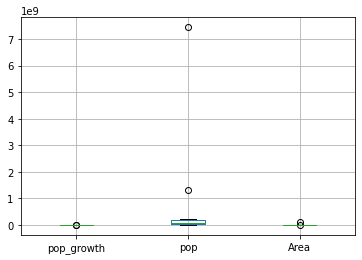

In [99]:
df.boxplot()

Replace the outliers with the NaN values and then drop them

In [100]:
df.columns

Index(['pop_growth', 'pop', 'Area'], dtype='object')

In [101]:
for label in ['pop_growth', 'pop', 'Area']:
    q3, q1 =np.percentile(df[label],[75,25])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    if lower<0:
        lower = df[label].min()
    df[label] = df[label].mask((df[label]<lower) | (df[label]>upper), np.nan)

In [102]:
df.head(20)

,pop_growth,pop,Area
Name,,,
Brazil,0.817556,207652865.0,NaN
Switzerland,1.077221,8372098.0,39516.0
Germany,1.193867,82667685.0,348900.0
Spain,-0.008048,46443959.0,500210.0
France,0.407491,66896109.0,547557.0
Japan,-0.115284,126994511.0,364560.0
Greece,-0.687543,10746740.0,128900.0
Iran,1.148789,80277428.0,1628760.0
Nigeria,NaN,185989640.0,910770.0


We see here dropping outliers is not a good strategy and it is not intutive since it dropped India and Brezile that are countries with more population and Area. But it does make sense to drop "World" since it is not a country. If you remember I mentioned in the class that somtimes I change the coefficient of iqr in lower and upper limit. I always look at the result after replacing the outliers by NaN and check if it makes sense or not. Here it is not and i just want to get rid of 'World' so ither I play with the coeffs of lower and upper limit (here it is good if you change it to 10) or simply drop that unwanted row

df.drop('world', axis = 0, inplace = True)